# Finding December QLCS tornadoes in Louisiana (1996 - 2017)

### Read in the svrgis table

In [1]:
from svrimg.utils.get_tables import get_table
import pandas as pd

df_svrgis = get_table(which='svrgis', haz_type='tor', data_dir="../data/csvs/")

df_svrgis.head()

,om,tz,st,stf,stn,mag,inj,fat,loss,closs,...,f3,f4,fc,init_date,fmt_date,date_utc,yr,mo,dy,hr
uid,,,,,,,,,,,,,,,,,,,,,
199601011725z000000001,1,3,FL,12,1,0,0,0,0.04,0.0,...,0,0,0,1996-01-01-11:25:00,1/1/1996 11:25,1/1/1996 17:25,1996,1,1,17
199601030010z000000859,859,3,SC,45,1,0,0,0,0.03,0.0,...,0,0,0,1996-01-02-18:10:00,1/2/1996 18:10,1/3/1996 0:10,1996,1,3,0
199601030020z000000860,860,3,SC,45,2,0,0,0,0.00,0.0,...,0,0,0,1996-01-02-18:20:00,1/2/1996 18:20,1/3/1996 0:20,1996,1,3,0
199601031307z000000004,4,3,FL,12,2,1,9,0,1.20,0.0,...,0,0,0,1996-01-03-07:07:00,1/3/1996 7:07,1/3/1996 13:07,1996,1,3,13
199601031340z000000005,5,3,FL,12,3,0,0,0,0.10,0.0,...,0,0,0,1996-01-03-07:40:00,1/3/1996 7:40,1/3/1996 13:40,1996,1,3,13


# Select month and state

In [2]:
import datetime
import pandas as pd

df_sub = df_svrgis[(df_svrgis.mo == 12) & (df_svrgis.st=='LA')].copy()
df_sub['date_utc'] = pd.to_datetime(df_sub.date_utc)

df_sub.head()

,om,tz,st,stf,stn,mag,inj,fat,loss,closs,...,f3,f4,fc,init_date,fmt_date,date_utc,yr,mo,dy,hr
uid,,,,,,,,,,,,,,,,,,,,,
199612152145z000001046,1046,3,LA,22,18,0,0,0,0.030,0.0,...,0,0,0,1996-12-15-15:45:00,12/15/1996 15:45,1996-12-15 21:45:00,1996,12,15,21
199812291530z000001399,1399,3,LA,22,26,0,0,0,0.010,0.0,...,0,0,0,1998-12-29-09:30:00,12/29/1998 9:30,1998-12-29 15:30:00,1998,12,29,15
199912050033z000000670,670,3,LA,22,48,0,0,0,0.000,0.0,...,0,0,0,1999-12-04-18:33:00,12/4/1999 18:33,1999-12-05 00:33:00,1999,12,5,0
200112121712z000000576,576,3,LA,22,17,1,0,0,0.150,0.0,...,0,0,0,2001-12-12-11:12:00,12/12/2001 11:12,2001-12-12 17:12:00,2001,12,12,17
200112122155z000000571,571,3,LA,22,22,0,0,0,0.001,0.0,...,0,0,0,2001-12-12-15:55:00,12/12/2001 15:55,2001-12-12 21:55:00,2001,12,12,21


# Request images from svrimg that correspond to the indexes of the December tornadoes in Louisiana

In [3]:
from svrimg.utils.get_images import request_images

file_locs = request_images(df_sub.index.values, haz_type='tor')

file_locs

{'199612152145z000001046': '../data/tor/1996/199612152145z000001046.png',
 '199812291530z000001399': '../data/tor/1998/199812291530z000001399.png',
 '199912050033z000000670': '../data/tor/1999/199912050033z000000670.png',
 '200112121712z000000576': '../data/tor/2001/200112121712z000000576.png',
 '200112122155z000000571': '../data/tor/2001/200112122155z000000571.png',
 '200112140230z000000579': '../data/tor/2001/200112140230z000000579.png',
 '200112140305z000000580': '../data/tor/2001/200112140305z000000580.png',
 '200112222221z000000556': '../data/tor/2001/200112222221z000000556.png',
 '200212182155z000000394': '../data/tor/2002/200212182155z000000394.png',
 '200212190110z000000391': '../data/tor/2002/200212190110z000000391.png',
 '200212191930z000000404': '../data/tor/2002/200212191930z000000404.png',
 '200212310555z000000461': '../data/tor/2002/200212310555z000000461.png',
 '200412090725z000000722': '../data/tor/2004/200412090725z000000722.png',
 '200612211500z000001068': '../data/to

# Read in the storm mode classifier

You can create your own in the notebook "Train_Model"

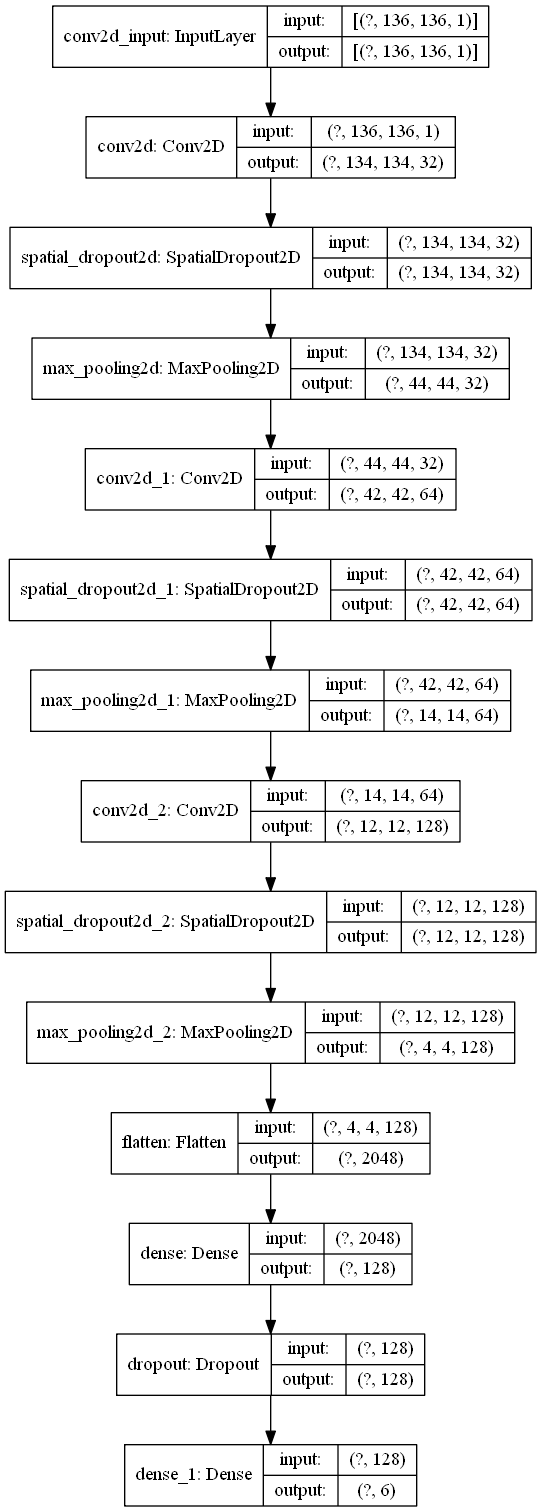

In [4]:
from tensorflow import keras

model = keras.models.load_model("../data/models/morph_model_v01.h5")

keras.utils.plot_model(model, show_shapes=True)

# Put images into an array and normalize them so the model can predict their class

In [5]:
from numpy import expand_dims
from svrimg.utils.get_images import get_img_list
import numpy as np

imgs = get_img_list(df_sub.index.values, haz_type="tor", keep_missing=True)
imgs = expand_dims(imgs, 3)
imgs = imgs / 80 #normalize

preds = model.predict(imgs)

lookup = {0:'Cellular', 1:'QLCS', 2:'Tropical', 3:'Other', 4:'Noise', 5:'Missing'}

for index, cls in lookup.items():

    df_sub[cls] = preds[:, index]

df_sub['Classification'] = [lookup[x] for x in np.argmax(preds, axis=1)]

# Plot the tornado locations with colors corresponding to the storm mode the model predicted

PROJ: proj_create_from_database: Cannot find proj.db


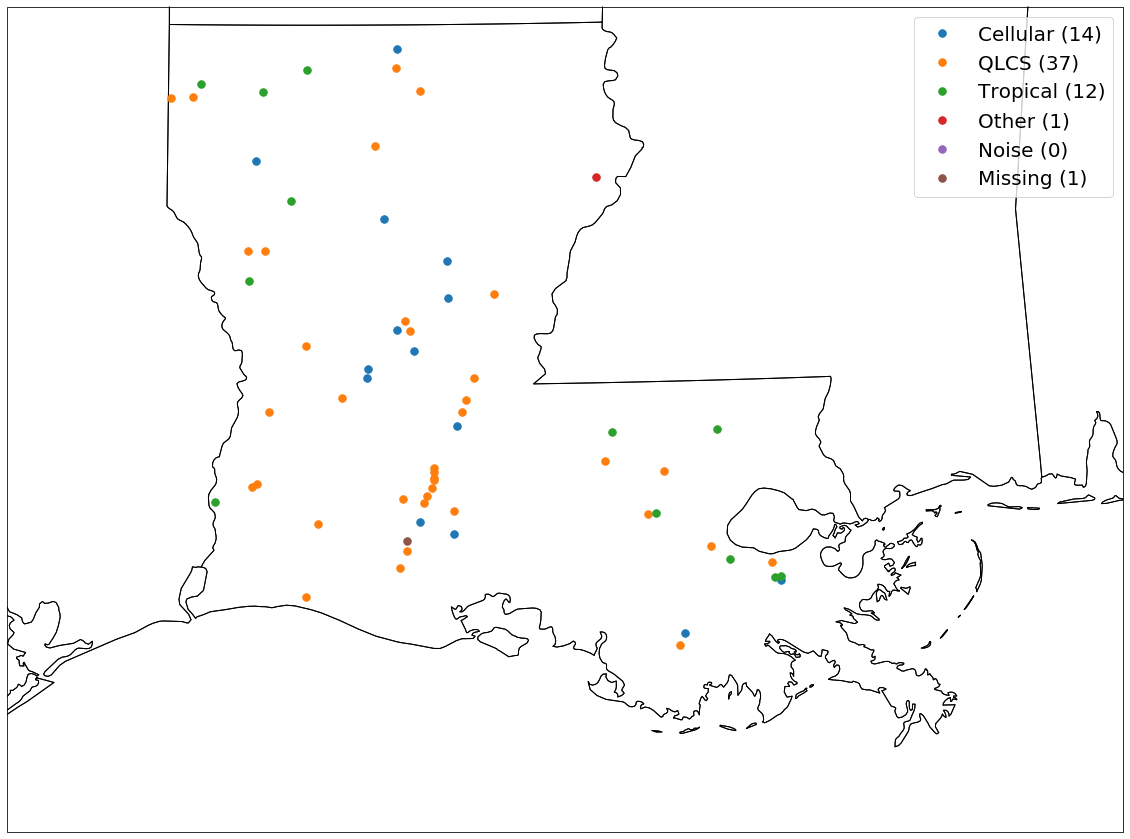

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 20

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=-93))
ax.set_extent([-95, -88, 28.5, 33])
ax.coastlines()
ax.add_feature(cfeature.STATES)

for index, cls in lookup.items():
    df_ = df_sub[df_sub.Classification==cls]
    
    plt.plot(df_.slon, df_.slat, '.', ms=15, label="{} ({})".format(cls, len(df_)), transform=ccrs.PlateCarree())
    
plt.legend(prop={"size":20})

# See which date had the most QLCS tornadoes

In [7]:
df_sub[df_sub.Classification=='QLCS'].groupby(df_sub.date_utc.dt.date).count().sort_values(by='om', ascending=False)

,om,tz,st,stf,stn,mag,inj,fat,loss,closs,...,mo,dy,hr,Cellular,QLCS,Tropical,Other,Noise,Missing,Classification
date_utc,,,,,,,,,,,,,,,,,,,,,
2009-12-24,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
2012-12-25,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2015-12-28,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2012-12-10,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2017-12-20,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1996-12-15,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1999-12-05,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2001-12-12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2001-12-14,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Download a few maps from svrimg (interface coming soon)

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'str'

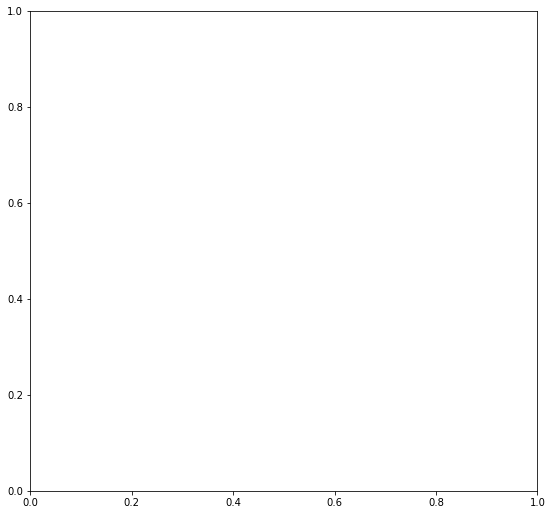

In [8]:
import urllib.request 
from imageio import imread

plt.rcParams['figure.figsize'] = 20, 30

top_url = "https://svrimg.org/data/{}/{}.png"

for idx, (rid, row) in enumerate(df_sub[df_sub.Classification=='QLCS'].sample(6).iterrows()):
    
    ax = plt.subplot(3, 2, idx+1)
    
    pic_url = top_url.format(row.yr, rid)
    
    response = urllib.request.urlretrieve(pic_url, "tmp{}.png".format(idx))
    
    img = imread("tmp{}.png".format(idx))
    
    ax.set_title(row.date_utc + " z\n" + rid, fontsize=20)
    
    ax.imshow(img)
    plt.axis('off')